In [71]:
# Feature extraction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/HR_data.csv')
df = df.iloc[:, 1:]

In [72]:
df.head(5)

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,0.9775,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,0.1900,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,0.3575,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,0.6500,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,0.3375,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [73]:
index = list(df.columns).index("Frustrated")
X = df.iloc[:, :index]
#X = df.iloc[:, :]


y = df.iloc[:, index:]
y.drop("Cohort", axis=1, inplace=True)

#X = pd.get_dummies(X, columns=["Cohort"])
#X = pd.get_dummies(X, columns=["Cohort", "Round", "Phase"])

X = X.replace("phase1", 1) 
X = X.replace("phase2", 2)
X = X.replace("phase3", 3)

X = X.replace("round_1", 1)
X = X.replace("round_2", 2)
X = X.replace("round_3", 3)
X = X.replace("round_4", 4)



nan_rows_X = X.isnull().T.any().T
nan_rows_y = y.isnull().T.any().T

nan_rows = nan_rows_X | nan_rows_y

nan_rows = nan_rows[nan_rows == True]

X = X.drop(nan_rows.index)
y = y.drop(nan_rows.index)

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
features = X.columns


In [75]:
print(X.to_markdown())

|     |   HR_TD_Mean |   HR_TD_Median |   HR_TD_std |   HR_TD_Min |   HR_TD_Max |   HR_TD_AUC |   HR_TD_Kurtosis |   HR_TD_Skew |   HR_TD_Slope_min |   HR_TD_Slope_max |   HR_TD_Slope_mean |   HR_TD_Slope |   TEMP_TD_Mean |   TEMP_TD_Median |   TEMP_TD_std |   TEMP_TD_Min |   TEMP_TD_Max |   TEMP_TD_AUC |   TEMP_TD_Kurtosis |   TEMP_TD_Skew |   TEMP_TD_Slope_min |   TEMP_TD_Slope_max |   TEMP_TD_Slope_mean |   TEMP_TD_Slope |   EDA_TD_P_Mean |   EDA_TD_P_Median |   EDA_TD_P_std |   EDA_TD_P_Min |   EDA_TD_P_Max |   EDA_TD_P_AUC |   EDA_TD_P_Kurtosis |   EDA_TD_P_Skew |   EDA_TD_P_Slope_min |   EDA_TD_P_Slope_max |   EDA_TD_P_Slope_mean |   EDA_TD_P_Slope |   EDA_TD_T_Mean |   EDA_TD_T_Median |   EDA_TD_T_std |   EDA_TD_T_Min |   EDA_TD_T_Max |   EDA_TD_T_AUC |   EDA_TD_T_Kurtosis |   EDA_TD_T_Skew |   EDA_TD_T_Slope_min |   EDA_TD_T_Slope_max |   EDA_TD_T_Slope_mean |   EDA_TD_T_Slope |   EDA_TD_P_Peaks |   EDA_TD_P_RT |   EDA_TD_P_ReT |   Round |   Phase |   Individual |   Puzzler |
|

In [76]:
print(y.to_markdown()) 

|     |   Frustrated |   upset |   hostile |   alert |   ashamed |   inspired |   nervous |   attentive |   afraid |   active |   determined |
|----:|-------------:|--------:|----------:|--------:|----------:|-----------:|----------:|------------:|---------:|---------:|-------------:|
|   0 |            2 |       1 |         1 |       2 |         1 |          2 |         2 |           3 |        1 |        2 |            2 |
|   1 |            3 |       2 |         1 |       3 |         2 |          2 |         2 |           3 |        1 |        3 |            3 |
|   2 |            2 |       1 |         1 |       2 |         1 |          3 |         2 |           3 |        2 |        3 |            3 |
|   3 |            2 |       1 |         1 |       2 |         1 |          3 |         2 |           3 |        2 |        3 |            3 |
|   4 |            2 |       3 |         1 |       3 |         2 |          3 |         3 |           4 |        2 |        4 |            4 |

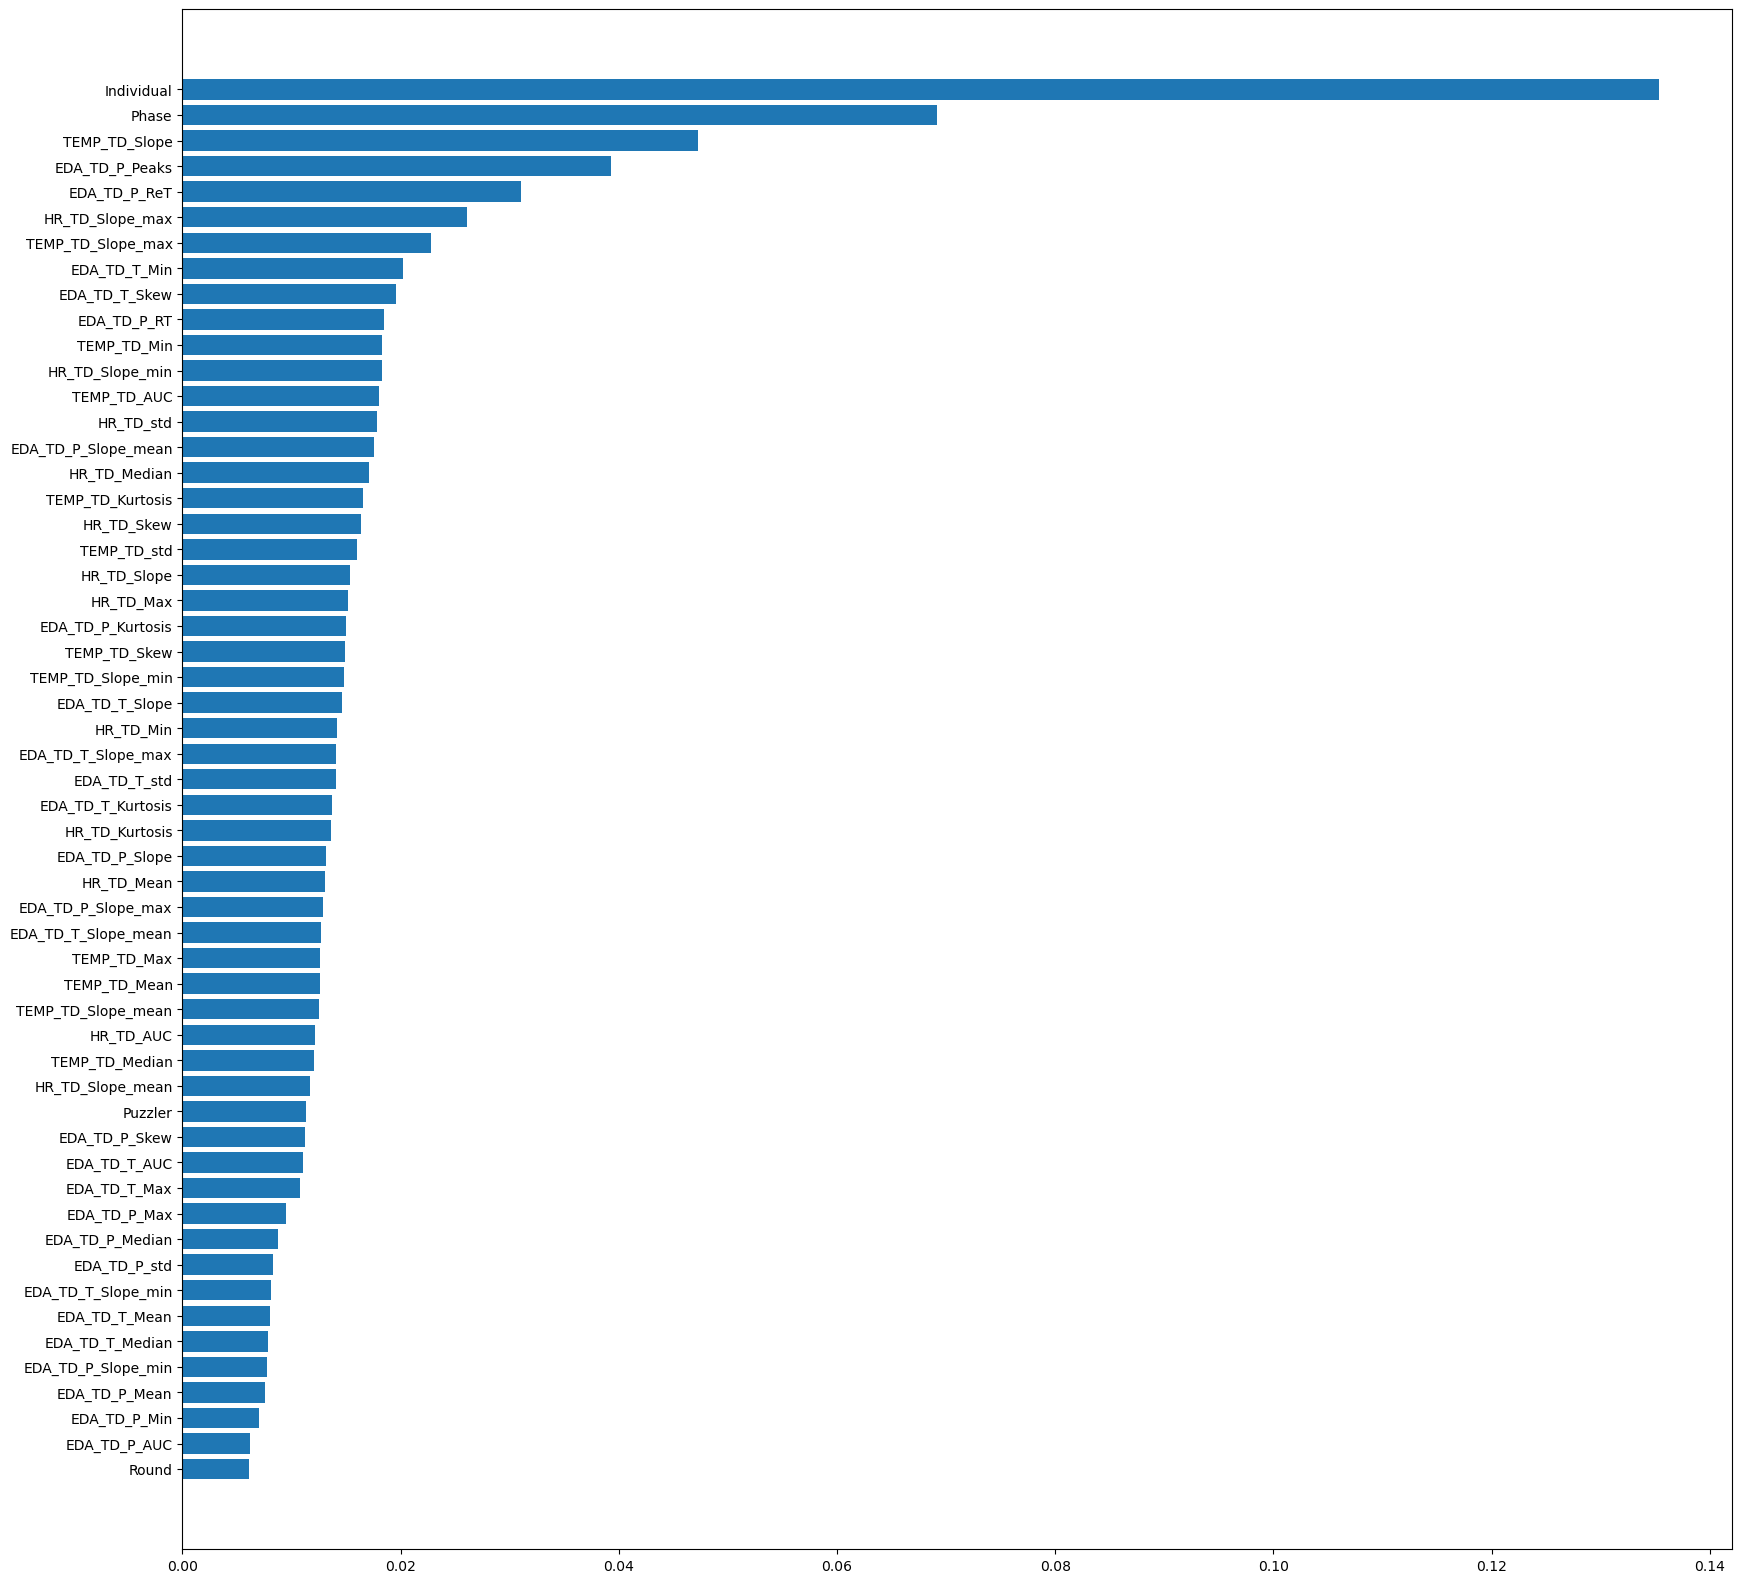

In [77]:
from sklearn.ensemble import RandomForestRegressor

# Feature extraction through supervised learning
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])

# Set the figure size
plt.figure(figsize=(20, 20))  # Adjust the width and height as needed

plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [78]:
from sklearn.feature_selection import RFECV
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train) 

selected_features = np.array(features)[rfe.get_support()]

In [79]:
X_RFECV = X[selected_features]

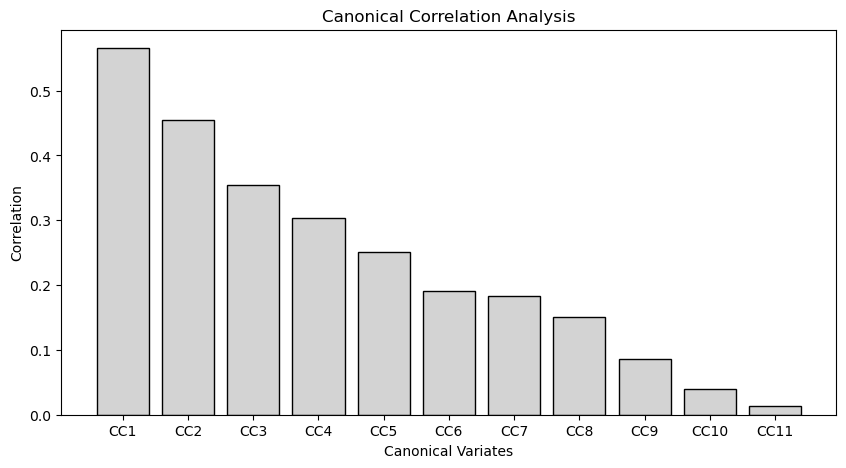

In [80]:
# CCA Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
import seaborn as sns
scaler = StandardScaler() 
X_sc = scaler.fit_transform(X_RFECV)
Y_sc = scaler.fit_transform(y)

n_comp = 11 #choose number of canonical variates pairs 

bar_titles = ["CC" + str(x) for x in range(1, n_comp+1)] #create list of bar titles

cca = CCA(n_components=n_comp, scale=True) #define CCA
cca.fit(X_sc, Y_sc) #fit our scaled data

X_c, Y_c = cca.transform(X_sc, Y_sc) #transform our datasests to obtain canonical variates 

comp_corr = [np.corrcoef(X_c[:, i], Y_c[:, i])[1][0] for i in range(n_comp)]
plt.figure(figsize=(10, 5))
plt.bar(bar_titles, comp_corr, color='lightgrey', width=0.8, edgecolor='black')
plt.xlabel('Canonical Variates')
plt.ylabel('Correlation')
plt.title('Canonical Correlation Analysis')

plt.show()





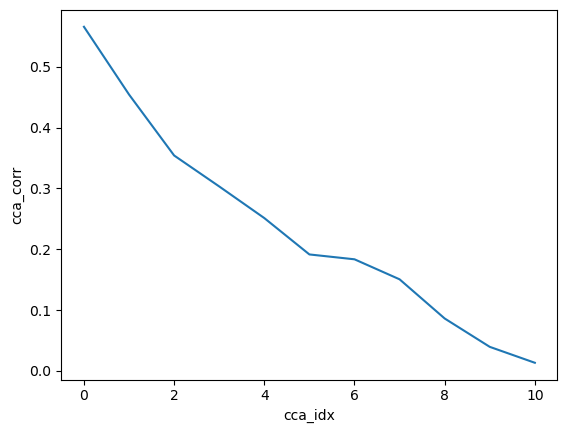

In [81]:
# calculate and plot the correlations of all components

corrs = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(n_comp)]    
plt.plot(corrs)
plt.xlabel('cca_idx')
plt.ylabel('cca_corr')
plt.show()

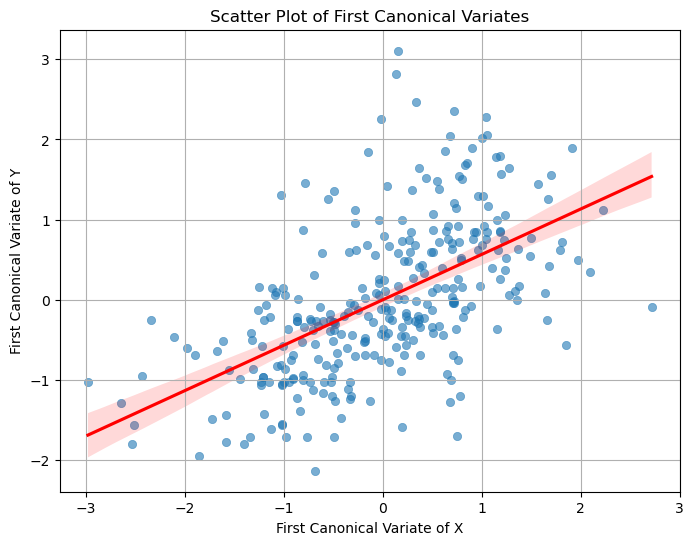

In [82]:
# Select the first canonical variates
x_variate = X_c[:, 0]
y_variate = Y_c[:, 0]

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_variate, y=y_variate, alpha=0.6, edgecolor=None)
sns.regplot(x=x_variate, y=y_variate, scatter=False, color='red')  # regression line

plt.title('Scatter Plot of First Canonical Variates')
plt.xlabel('First Canonical Variate of X')
plt.ylabel('First Canonical Variate of Y')
plt.grid(True)  # Add grid for better readability
plt.show()

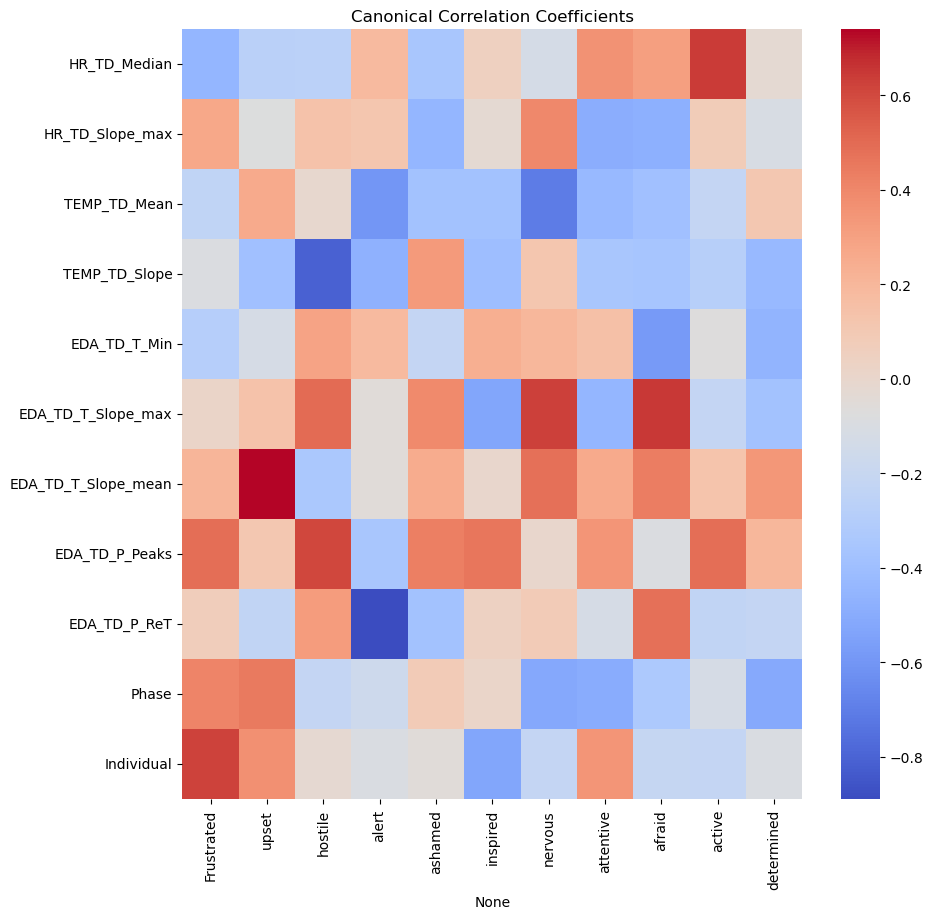

In [86]:

# Create a figure with two subplots side by side
plt.figure(figsize=(10,10))

# Initial correlation matrix
XY = pd.concat([X_RFECV, y], axis=1)
corr_coeff = XY.corr()
corr_coeff = corr_coeff.drop(y.columns, axis=0)


coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [y.columns])
coef_df.index = X_RFECV.columns

# Plot the second heatmap
sns.heatmap(coef_df, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Canonical Correlation Coefficients')

plt.show()

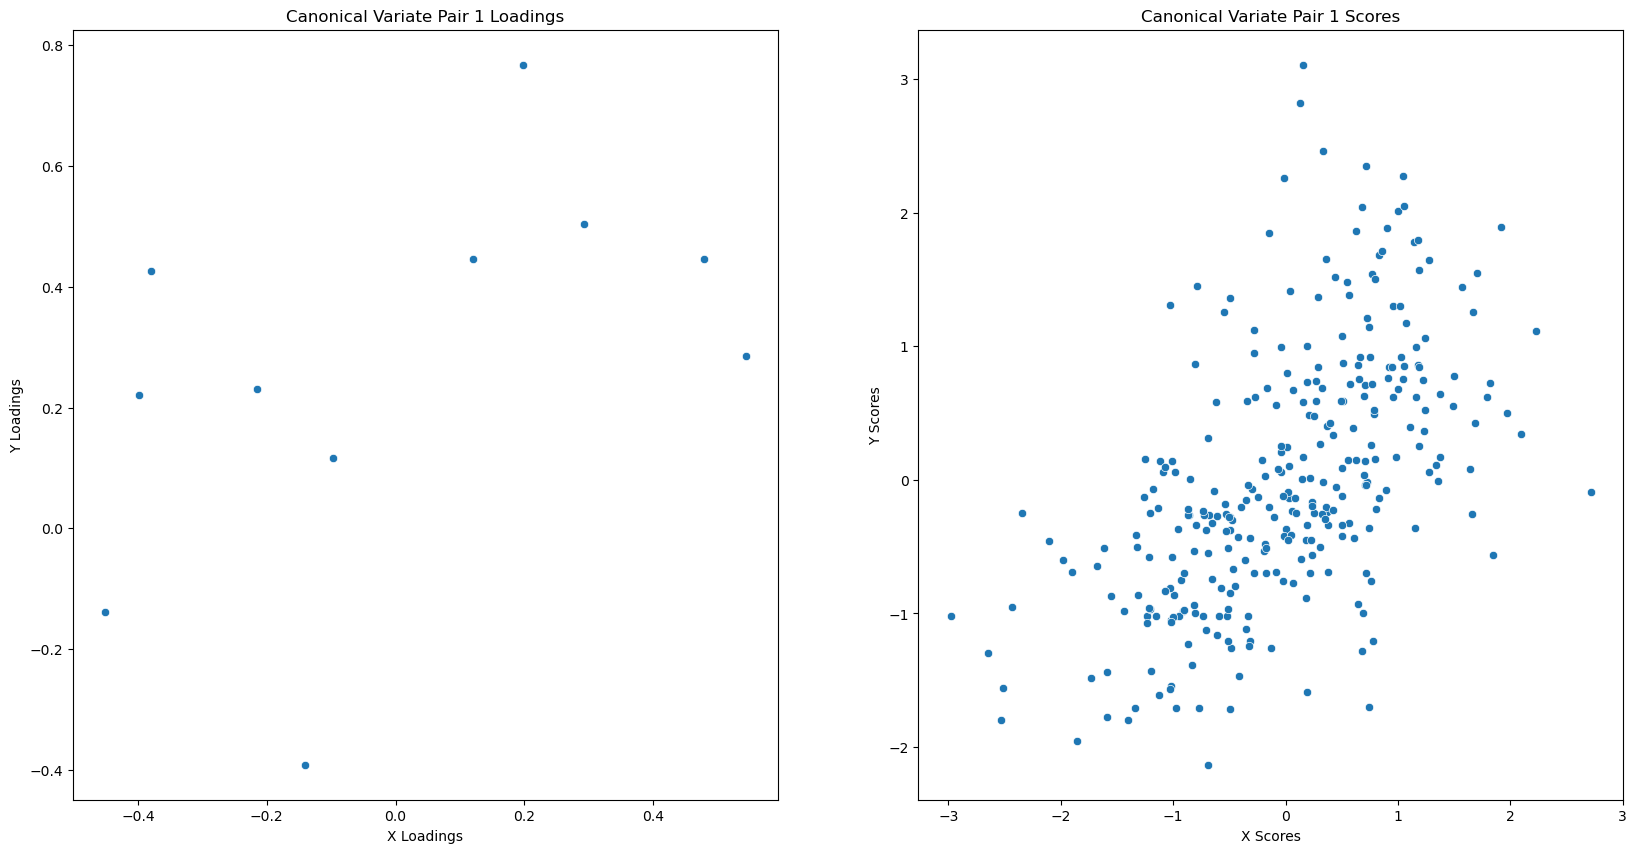

In [84]:
# Plot the first canonical variate pair loadings

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Loadings for the first canonical variate pair
loadings_X = cca.x_loadings_[:, 0]
loadings_Y = cca.y_loadings_[:, 0]

# Plot the first canonical variate pair loadings
sns.scatterplot(x=loadings_X, y=loadings_Y, ax=axs[0])
axs[0].set_title('Canonical Variate Pair 1 Loadings')
axs[0].set_xlabel('X Loadings')
axs[0].set_ylabel('Y Loadings')

# Plot the first canonical variate pair scores
sns.scatterplot(x=X_c[:, 0], y=Y_c[:, 0], ax=axs[1])
axs[1].set_title('Canonical Variate Pair 1 Scores')
axs[1].set_xlabel('X Scores')
axs[1].set_ylabel('Y Scores')

plt.show()



